# Лабараторна робота №1
## з дисципліни "Інтелектуальний аналіз даних"
## Баштового Івана
## Варіант 18

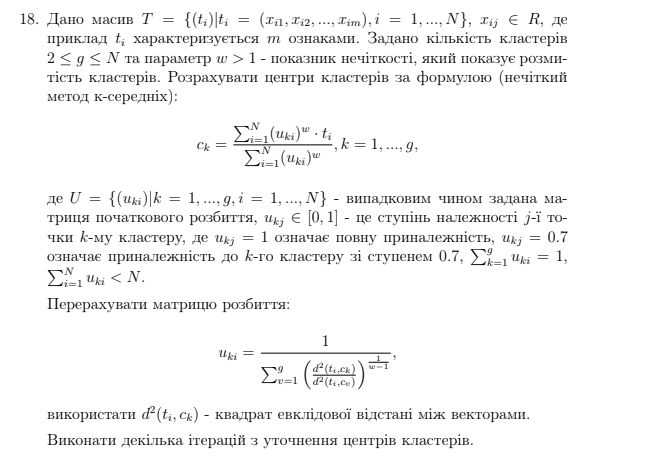

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
class FuzzyKMeans:
    def __init__(self, n_clusters, w=2, max_iters=100, tol=1e-4, random_state=1):
        self.n_clusters = n_clusters
        self.w = w
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.membership_matrix = None

    def initialize_membership_matrix(self, n_samples):
        return np.random.rand(n_samples, self.n_clusters)
    
    def initialize_centroids(self, x):
        x_copy = np.copy(x)
        np.random.shuffle(x_copy)
        return x_copy[: self.n_clusters]
    
    def update_membership_matrix(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return 1 / np.sum((distances[:, :, np.newaxis] / distances[:, np.newaxis, :]) ** (2 / (self.w - 1)), axis=2)

    def update_centroids(self, X):
        numerator = np.dot(X.T, (self.membership_matrix ** self.w))
        denominator = np.sum(self.membership_matrix ** self.w, axis=0)
        return numerator.T / denominator[:, np.newaxis]

    def move_centroids(self, X):
        n_samples, n_features = X.shape
        self.membership_matrix = self.initialize_membership_matrix(n_samples)
        self.centroids = self.initialize_centroids(X)

        for _ in range(self.max_iters):
            old_centroids = self.centroids.copy()
            self.centroids = self.update_centroids(X)
            self.membership_matrix = self.update_membership_matrix(X)
            if np.linalg.norm(self.centroids - old_centroids) < self.tol:
                break

    def final_centroids(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        #print(distances)
        return np.argmin(distances, axis=1)
    
    def plot_clusters(self, X):
            plt.figure(figsize=(8, 6))
            plt.scatter(X[:, 0], X[:, 1], c=self.final_centroids(X), cmap='viridis', marker='o', s=50)
            plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
            plt.title('Fuzzy K-Means Clustering')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.legend()
            plt.show()
            
    def elbow_method(self, X, max_clusters=10):
        distortions = []
        for k in range(1, max_clusters + 1):
            fuzzy_kmeans = FuzzyKMeans(n_clusters=k, w=self.w, max_iters=self.max_iters, tol=self.tol,
                                       random_state=self.random_state)
            fuzzy_kmeans.move_centroids(X)
            distortions.append(fuzzy_kmeans._calculate_distortion(X))

        plt.figure(figsize=(8, 6))
        plt.plot(range(1, max_clusters + 1), distortions, marker='o', linestyle='-', color='b')
        plt.title('Elbow Method')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Distortion (Inertia)')
        plt.grid(True)
        plt.show()

    def _calculate_distortion(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        min_distances = np.min(distances, axis=1)
        return np.sum(min_distances ** 2)

In [17]:
np.random.seed(37)
X = np.vstack(((np.random.randn(150, 2)  + np.array([3, 0])),
               (np.random.randn(100, 2)  + np.array([-3.5, 0.5])),
               (np.random.randn(100, 2) + np.array([-0.5, -2])),
               (np.random.randn(150, 2) + np.array([-2, -2.5])),
               (np.random.randn(150, 2) + np.array([-5.5, -3]))))

In [4]:
print('First five examples: ', X[:5])
print('X.shape:', X.shape)

First five examples:  [[ 2.94553639  0.67430807]
 [ 3.34664703 -1.30034617]
 [ 4.51851188  0.98982371]
 [ 3.2776809  -0.44858935]
 [ 3.96196624 -0.82757864]]
X.shape: (650, 2)


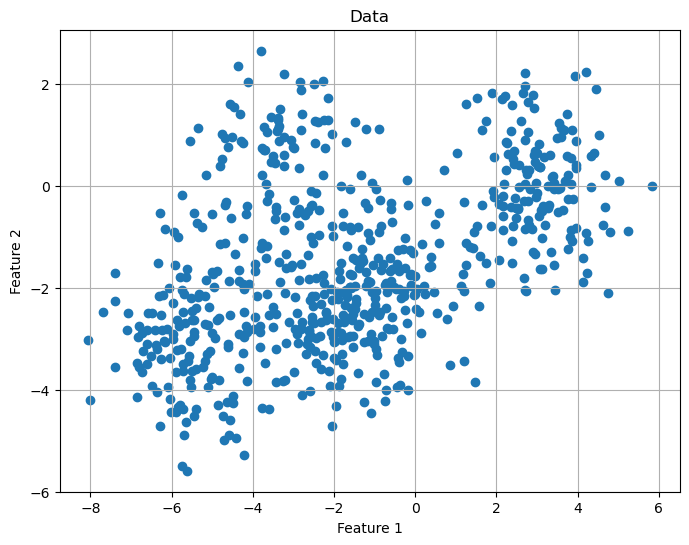

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Cluster centroids:
[[ 2.84418173 -0.07973019]
 [-1.65791158 -1.83150806]
 [-5.22539978 -2.60887992]]
[[ 0.76081959  5.24126393  8.80587993]
 [ 1.31999044  5.03266726  8.67134633]
 [ 1.98678811  6.79029599 10.38722688]
 ...
 [ 8.66873789  4.00606628  2.1040188 ]
 [ 8.18094534  3.48580392  0.76663098]
 [ 7.99420582  3.2029196   1.3021688 ]]
Predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 2 2 2 1 1 1 2 2 1 1 1 1 1 1 2 1 2 2 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 2 2 1 1 1 2 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 0 1 0

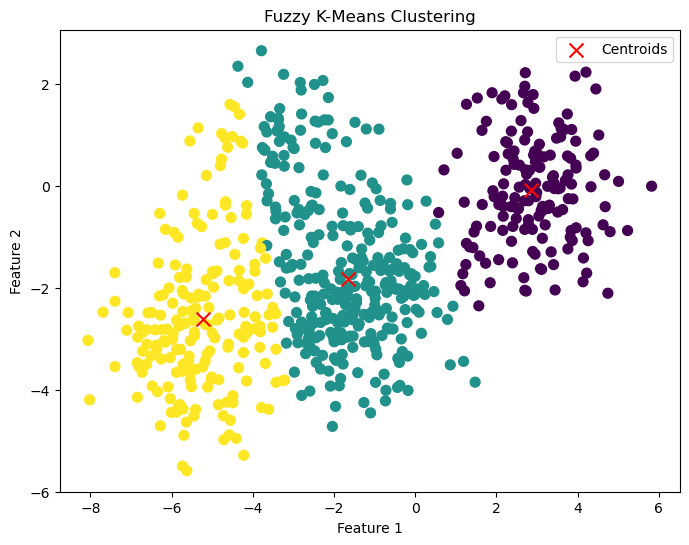

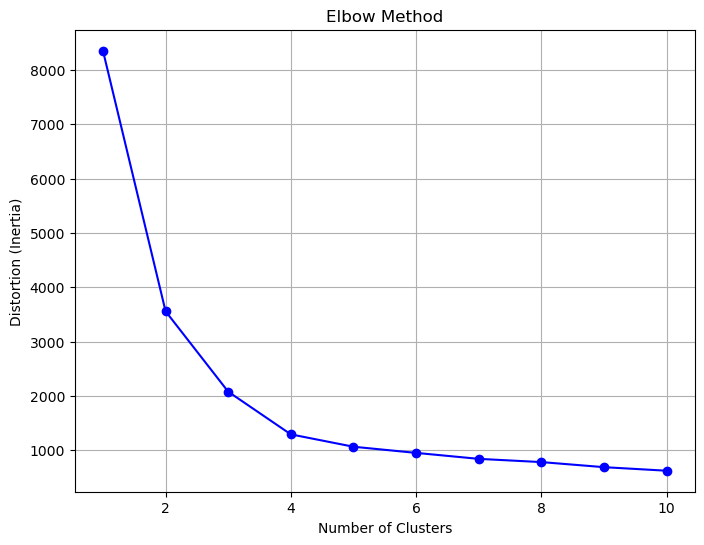

In [22]:
fuzzy_kmeans = FuzzyKMeans(n_clusters=3, w=2)
fuzzy_kmeans.move_centroids(X)

print("Cluster centroids:")
print(fuzzy_kmeans.centroids)

predictions = fuzzy_kmeans.final_centroids(X)
print("Predictions:")
print(predictions)

fuzzy_kmeans.plot_clusters(X)
elbow_method = fuzzy_kmeans.elbow_method(X, max_clusters=10)